In [59]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])

import os
import numpy as np 
import matplotlib.pyplot as plt

import joseTOV.utils as jose_utils

from scipy.stats import pearsonr

params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

# Improved corner kwargs
default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        truth_color = "red",
                        save=False)

In [60]:
outdir = "./outdir/"

mtov_array_outdir = []
pressures_outdir = []

for seed_nr in os.listdir(outdir):
    npz_file = os.path.join(outdir, seed_nr, "data", "0.npz")
    
    if not os.path.exists(npz_file):
        print("File does not exist, skipping")
        continue
    
    try:
        data = np.load(npz_file)
    except Exception as e:
        print(f"Could not read npz file, error: {e}")
        
    masses_EOS = data["masses_EOS"]
    mtov = np.max(masses_EOS)
    
    n = data["n"] / jose_utils.fm_inv3_to_geometric / 0.16
    p = data["p"] / jose_utils.MeV_fm_inv3_to_geometric
    
    # Get the pressure at 4 nsat
    p_4nsat = np.interp(4.0, n, p)
    
    mtov_array_outdir.append(mtov)
    pressures_outdir.append(p_4nsat)

In [61]:
# ylabel = r"$p(4n_{\rm sat})$ [MeV fm$^{-3}$]"
# xlabel = r"$M_{\rm TOV}$ [M$_\odot$]"
# r, p = pearsonr(mtov_array, pressures)

# print("r")
# print(r)

# print("p")
# print(p)

# # Linear fit
# m, b = np.polyfit(mtov_array, pressures, 1)

# print(m, b)

# x_array = np.linspace(np.min(mtov_array), np.max(mtov_array), 200)
# y_array = m * x_array + b

# x_point = np.mean([min_mass, max_mass])
# y_point = m * x_point + b

# # Get the line perpendicular on this:
# m_perp = - m
# y_array_perp = m_perp * (x_array - x_point) + y_point

# plt.scatter(mtov_array, pressures, label = "Data")
# plt.scatter(x_point, y_point, color = "black")
# plt.plot(x_array, y_array, color = "green", label = "Fit")
# plt.plot(x_array, y_array_perp, color = "red", label = "anti-fit")
# plt.xlabel(xlabel)
# plt.ylabel(ylabel)
# plt.legend(bbox_to_anchor = (1.05, 0.5))
# plt.show()

# Large scale population studies with random samples

r
0.9515672049661273
p
1.6625742055550543e-247
479.08084846634307 -770.4679489318194


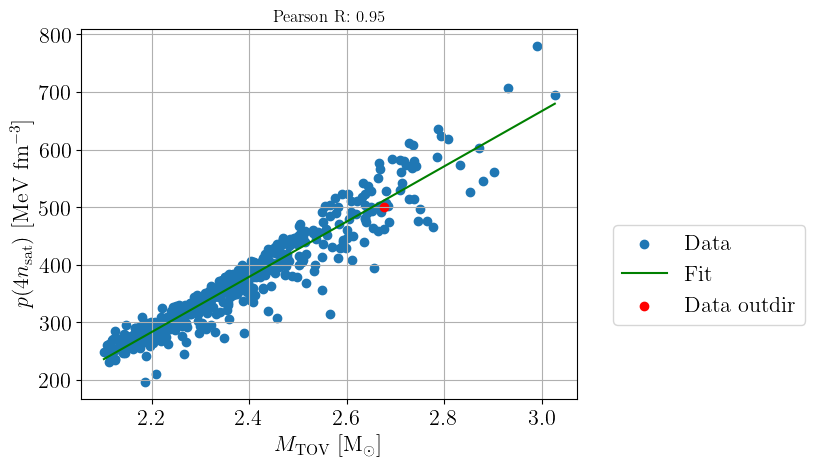

In [62]:
outdir = "./random_samples/"

mtov_array = []
pressures = []

for i in os.listdir(outdir):
    npz_file = os.path.join(outdir, i)
    
    if not os.path.exists(npz_file):
        print("File does not exist, skipping")
        continue
    
    try:
        data = np.load(npz_file)
    except Exception as e:
        print(f"Could not read npz file, error: {e}")
        
    masses_EOS = data["masses_EOS"]
    mtov = np.max(masses_EOS)
    
    min_mass = 2.1
    max_mass = 4.0
    
    if mtov < min_mass or mtov > max_mass:
        continue
    
    n = data["n"] / jose_utils.fm_inv3_to_geometric / 0.16
    p = data["p"] / jose_utils.MeV_fm_inv3_to_geometric
    
    # Get the pressure at 4 nsat
    p_4nsat = np.interp(4.0, n, p)
    
    mtov_array.append(mtov)
    pressures.append(p_4nsat)

r, p = pearsonr(mtov_array, pressures)

print("r")
print(r)

print("p")
print(p)

# Linear fit
m, b = np.polyfit(mtov_array, pressures, 1)

print(m, b)

x_array = np.linspace(np.min(mtov_array), np.max(mtov_array), 200)
y_array = m * x_array + b

min_mass = max(min_mass, np.min(mtov_array))
max_mass = min(max_mass, np.max(mtov_array))

x_point = np.mean([min_mass, max_mass])
y_point = m * x_point + b

# Get the line perpendicular on this:
m_perp = - m
y_array_perp = m_perp * (x_array - x_point) + y_point

plot_antifit = False

plt.scatter(mtov_array, pressures, label = "Data")
plt.plot(x_array, y_array, color = "green", label = "Fit")
if plot_antifit:
    plt.scatter(x_point, y_point, color = "black")
    plt.plot(x_array, y_array_perp, color = "red", label = "anti-fit")

plt.scatter(mtov_array_outdir, pressures_outdir, label = "Data outdir", color = "red")
plt.xlabel(r"$M_{\rm TOV}$ [M$_\odot$]")
plt.ylabel(r"$p(4n_{\rm sat})$ [MeV fm$^{-3}$]")
plt.legend(bbox_to_anchor = (1.05, 0.5))
plt.title("Pearson R: {:.2f}".format(r))
if plot_antifit:
    plt.savefig("./figures/correlation_MTOV_pressure_antifit.pdf", bbox_inches = "tight")
else:
    plt.savefig("./figures/correlation_MTOV_pressure.pdf", bbox_inches = "tight")